## A. Given the image “HM.jpg” (small squares correspond to pixels). Find white pixels, that do not have 4-connected neighboring pixels.

### Hint: Perform Hit-or-Miss transform. Create image matrix similar to HM.jpg and then process.

## Import library and load the image in grayscale

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('HM.jpg', cv2.IMREAD_GRAYSCALE)


## Get the Binary image and get the structuring element 

In [3]:
# conver the image to binary
binary_image = cv2.threshold(image, 127, 1, cv2.THRESH_BINARY)[1]

# this is the structuring element and will be used in the hit or miss algorithm,
#kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))


## Perform hit-and-miss algorithm by passing the binary image and the structuring element

- This code performs the Hit-or-Miss transform on a binary image using a specified kernel

In [4]:
# Perform the Hit-or-Miss transform
result = cv2.morphologyEx(binary_image, cv2.MORPH_HITMISS, kernel)


## Display the orignal, Binary and the hit-and-miss generated image

- This code displays three images: the original image, a binary image and the result of a hit-and-miss transformation

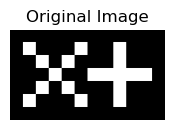

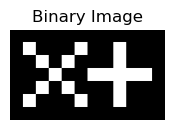

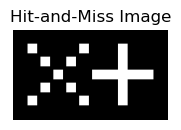

In [5]:
#display the image that is loaded

#original image
fig = plt.figure(figsize=(2, 2))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

#binary image
fig = plt.figure(figsize=(2, 2))
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

#hit and miss transformation
fig = plt.figure(figsize=(2, 2))
plt.imshow(result, cmap='gray')
plt.title('Hit-and-Miss Image')
plt.axis('off')
plt.show()

## B. Given “lena_RGB.tif” image. Perform Prewitt, Sobel and Canny edge Detection. Compare the results.

In [6]:
# Read the image
image = cv2.imread('lena_RGB.tif')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray_image,(3,3),0)

# Perform Prewitt edge detection
#mask taken from the slide titled Gradiant operator
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
prewitt_edges_x = cv2.filter2D(img_gaussian, -1, prewitt_kernel_x)
prewitt_edges_y = cv2.filter2D(img_gaussian, -1, prewitt_kernel_y)
prewitt_edges = cv2.addWeighted(prewitt_edges_x, 0.5, prewitt_edges_y, 0.5, 0)

# Perform Sobel edge detection
sobel_edges_x = cv2.Sobel(img_gaussian, cv2.CV_8UC1, 1, 0, ksize=3)
sobel_edges_y = cv2.Sobel(img_gaussian, cv2.CV_8UC1, 0, 1, ksize=3)
sobel_edges = cv2.addWeighted(sobel_edges_x, 0.5, sobel_edges_y, 0.5, 0)

# Perform Canny edge detection
canny_edges = cv2.Canny(img_gaussian, 100, 200)

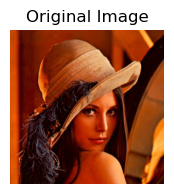

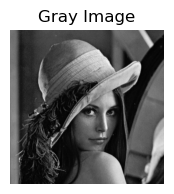

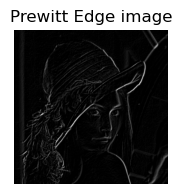

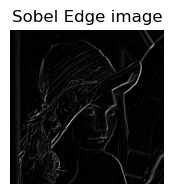

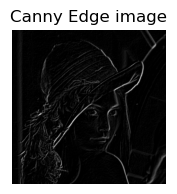

In [7]:
#display the image that is loaded

#original image
fig = plt.figure(figsize=(2, 2))
plt.imshow((cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))
plt.title('Original Image')
plt.axis('off')
plt.show()

#Gray Image
fig = plt.figure(figsize=(2, 2))
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')
plt.show()

#prewitt edge image
fig = plt.figure(figsize=(2, 2))
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge image')
plt.axis('off')
plt.show()

#Sobel edge image
fig = plt.figure(figsize=(2, 2))
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Sobel Edge image')
plt.axis('off')
plt.show()

#Canny edge image
fig = plt.figure(figsize=(2, 2))
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Canny Edge image')
plt.axis('off')
plt.show()

## C. Perform Laplacian to sharpen the “moon.tif” image.

- This code loads an image, applies a Laplacian kernel for edge detection, and sharpens the image by adding the Laplacian result to the original. It then displays the original and sharpened images.

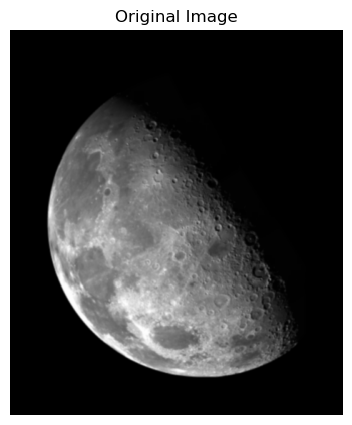

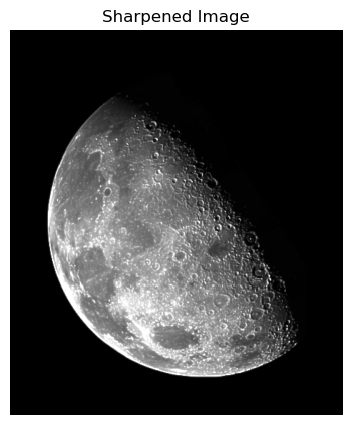

In [23]:

# Load the image
image = cv2.imread('moon.tif')


# Create the Laplacian kernel
#laplacian mask taken from the slide, using 9 gives more contrast
kernel = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

# Apply the Laplacian kernel to the image
laplacian_image = cv2.filter2D(image, -1, kernel)

# Sharpen the image by adding the Laplacian image to the original image
sharpened = cv2.add(image, laplacian_image)

#display the original image
fig = plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()


#display the sharpened image
fig = plt.figure(figsize=(5, 5))
plt.imshow(sharpened)
plt.title('Sharpened Image')
plt.axis('off')
plt.show()
